##Installing dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

##Uploading the dataset

In [12]:
df = pd.read_csv('Unemployment in India.csv')

##Dataset description

In [13]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df.shape

(768, 7)

In [15]:
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.3+ KB


In [17]:
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [20]:
df.columns =['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [21]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [71]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Frequency']= df['Frequency'].astype('category')
df['Year'] =  df['Date'].dt.year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Month'] =  df['Date'].dt.month
df['MonthNumber'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x] if pd.notnull(x) else '')
df['Region'] = df['Region'].astype('category')

In [72]:
df.drop(columns='Month',inplace=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep,2019


In [73]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber,Year
count,740.000000,7.400000e+02,740.000000,740.0,740.0
mean,11.787946,7.204460e+06,42.630122,6.390541,2019.418919
std,10.721298,8.087988e+06,8.111094,3.23507,0.493716
min,0.000000,4.942000e+04,13.330000,1.0,2019.0
25%,4.657500,1.190404e+06,38.062500,4.0,2019.0
50%,8.350000,4.744178e+06,41.160000,6.0,2019.0
75%,15.887500,1.127549e+07,45.505000,9.0,2020.0
max,76.740000,4.577751e+07,72.570000,12.0,2020.0


In [74]:
regionStats = df.groupby(['Area'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()
region_stats_rounded = round(regionStats, 2)
print(region_stats_rounded)

    Area  Estimated Unemployment Rate  Estimated Employed  \
0  Rural                        10.32         10192852.57   
1  Urban                        13.17          4388625.58   

   Estimated Labour Participation Rate  
0                                44.46  
1                                40.90  


##Employment and Unemployment Statistics based on area

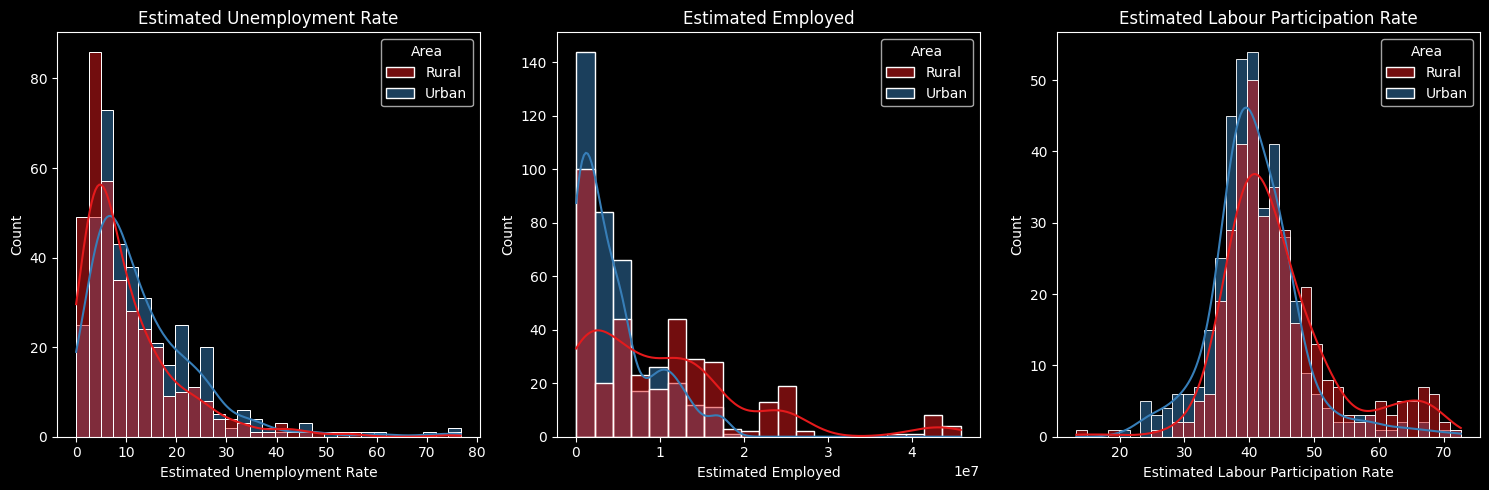

In [75]:
plt.style.use("dark_background")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(x="Estimated Unemployment Rate", hue="Area", data=df, kde=True, ax=axes[0], palette="Set1")
axes[0].set_title('Estimated Unemployment Rate')
sns.histplot(x="Estimated Employed", hue="Area", data=df, kde=True, ax=axes[1], palette="Set1")
axes[1].set_title('Estimated Employed')
sns.histplot(x="Estimated Labour Participation Rate", hue="Area", data=df, kde=True, ax=axes[2], palette="Set1")
axes[2].set_title('Estimated Labour Participation Rate')
plt.tight_layout()
plt.show()

##Heatmap based on unemplyment rate, employment rate and labour participation rate

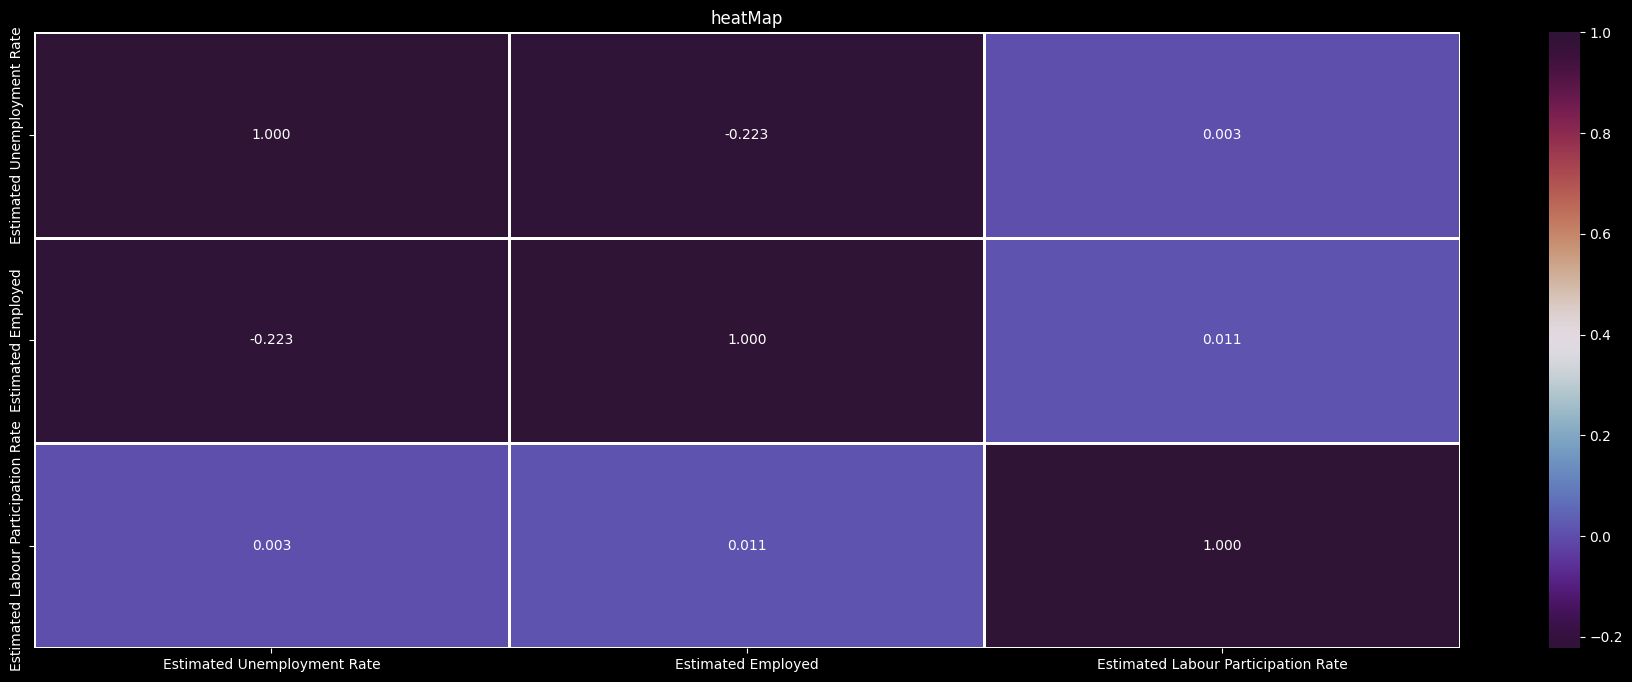

In [76]:
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate']]
heatMap = heatMap.corr()
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

##State wise average unemployment rate in percentage

In [83]:
newDF = df[['Estimated Unemployment Rate', 'Region']]
newDF = newDF.groupby('Region').mean().reset_index()
newDF = newDF.sort_values('Estimated Unemployment Rate')
fig = px.pie(newDF,
             values='Estimated Unemployment Rate',
             names='Region',
             title='Region-wise Average Unemployment Rate',
             hole=0.3,
             color='Region',
             color_discrete_sequence=px.colors.qualitative.Set1
             )

fig.update_layout(
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)
fig.show()

##Monthwise Unemployment rate in each states

In [79]:
df['MonthYear'] = df['MonthName'] + ' ' + df['Year'].astype(str)
fig = px.bar(df,
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame='MonthYear',
             animation_group='MonthName',
             color='Region',
             title='Region-wise Unemployment Rate',
             height=800)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig.show()

##Analysis of unemployment rate before lockdown and after lockdoen in march,2020

In [87]:
#after lockdown
df1 = df[(df['MonthNumber'] >= 3) & (df['Year'] ==2020)]
#before lockdown
df2 = df[((df['MonthNumber'] <= 2) & (df['Year'] ==2020)) | (df['Year'] ==2019)]

In [90]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName,Year,MonthYear
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural,3,Mar,2020,Mar 2020
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,4,Apr,2020,Apr 2020
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,5,May,2020,May 2020
13,Andhra Pradesh,2020-06-30,Monthly,0.85,15572975.0,53.76,Rural,6,Jun,2020,Jun 2020
23,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,Rural,3,Mar,2020,Mar 2020
...,...,...,...,...,...,...,...,...,...,...,...
739,Uttarakhand,2020-06-30,Monthly,5.08,989470.0,35.61,Urban,6,Jun,2020,Jun 2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,Mar,2020,Mar 2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,Apr,2020,Apr 2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May,2020,May 2020


In [91]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName,Year,MonthYear
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,2019,May 2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun,2019,Jun 2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul,2019,Jul 2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug,2019,Aug 2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep,2019,Sep 2019
...,...,...,...,...,...,...,...,...,...,...,...
745,West Bengal,2019-10-31,Monthly,7.83,10563686.0,43.25,Urban,10,Oct,2019,Oct 2019
746,West Bengal,2019-11-30,Monthly,6.61,10768462.0,43.44,Urban,11,Nov,2019,Nov 2019
747,West Bengal,2019-12-31,Monthly,7.24,11335696.0,45.97,Urban,12,Dec,2019,Dec 2019
748,West Bengal,2020-01-31,Monthly,7.27,11208617.0,45.39,Urban,1,Jan,2020,Jan 2020


In [92]:
df1g = df1.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
df2g = df2.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
df1g['Unemployment Rate before lockdown'] = df2g['Estimated Unemployment Rate']
df1g.columns = ['Region','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']
df1g.head()

,Region,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,13.576250,5.037500
1,Assam,6.578571,6.372632
2,Bihar,31.631250,13.833000
3,Chandigarh,14.325000,16.325000
4,Chhattisgarh,13.075000,7.706500


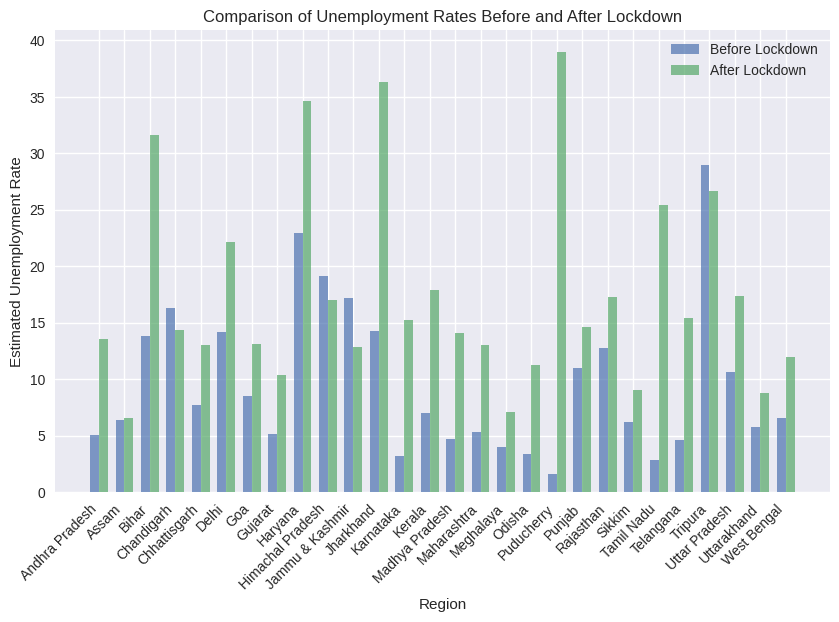

In [95]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df1g['Region']))
plt.bar(index, df1g['unemploymentRate B/ lockdown'], width=bar_width, label='Before Lockdown', alpha=0.7)
plt.bar([i + bar_width for i in index], df1g['unemploymentRate A/ lockdown'], width=bar_width, label='After Lockdown', alpha=0.7)

plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Comparison of Unemployment Rates Before and After Lockdown')
plt.xticks([i + bar_width / 2 for i in index], df1g['Region'], rotation=45, ha='right')
plt.legend()

plt.show()